In [5]:
# Imports
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import HTML
%matplotlib inline

# 0.0 Preprocessing

## 0.1 Load and visualise the dataset

In [66]:
df = pd.read_csv("data.csv", on_bad_lines='skip', engine='python')

In [67]:
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21673 entries, 0 to 21672
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 21673 non-null  int64 
 1   Title              21673 non-null  object
 2   Company            20781 non-null  object
 3   Date               21673 non-null  object
 4   Location           21673 non-null  object
 5   Area               13501 non-null  object
 6   Classification     21673 non-null  object
 7   SubClassification  21673 non-null  object
 8   Requirement        21673 non-null  object
 9   FullDescription    21187 non-null  object
 10  LowestSalary       21673 non-null  int64 
 11  HighestSalary      21673 non-null  int64 
 12  JobType            21200 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.1+ MB


In [70]:
df.describe()

,Id,LowestSalary,HighestSalary
count,2.167300e+04,21673.000000,21673.000000
mean,3.738861e+07,59.860195,78.924007
std,2.370948e+04,40.541324,43.979397
min,3.679829e+07,0.000000,30.000000
25%,3.738467e+07,30.000000,40.000000
50%,3.739185e+07,60.000000,70.000000
75%,3.739844e+07,80.000000,100.000000
max,3.740440e+07,150.000000,200.000000


In [73]:
df.isna().sum()

Id                      0
Title                   0
Company               892
Date                    0
Location                0
Area                 8172
Classification          0
SubClassification       0
Requirement             0
FullDescription       486
LowestSalary            0
HighestSalary           0
JobType               473
dtype: int64

The dataset contains a total of 318,477 job postings from the website seek from the collected between the 1st of October 2018 and the 13th of March 2019. The dataset has 13 categories, the variations of which can be seen below.

The columns consist of a mix of data types 2 integer columns and 12 string columns. Some columns have missing values, which will be addressed during data preparation.

In [6]:
import pandas as pd
from tabulate import tabulate

df = pd.read_csv('data.csv')

all_columns = ['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 
               'Classification', 'SubClassification', 'Requirement', 
               'FullDescription', 'LowestSalary', 'HighestSalary', 'JobType']

results = []

for column in all_columns:
    num_variations = df[column].nunique()
    results.append([column, num_variations])

print(tabulate(results, headers=['Category', 'Number of Variations'], tablefmt='pretty'))

num_variations_id = next(item[1] for item in results if item[0] == 'Id')
num_variations_date = next(item[1] for item in results if item[0] == 'Date')

id_to_date_ratio = num_variations_id / num_variations_date

print("Ratio of unique IDs to unique dates:", id_to_date_ratio)


/var/folders/4b/x1qmm8g167d86vjglntrzwdh0000gn/T/ipykernel_15687/447026757.py:4: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


+-------------------+----------------------+
|     Category      | Number of Variations |
+-------------------+----------------------+
|        Id         |        318477        |
|       Title       |        168065        |
|      Company      |        40628         |
|       Date        |         163          |
|     Location      |          65          |
|       Area        |          19          |
|  Classification   |          30          |
| SubClassification |         338          |
|    Requirement    |        234287        |
|  FullDescription  |        250901        |
|   LowestSalary    |          11          |
|   HighestSalary   |          11          |
|      JobType      |          4           |
+-------------------+----------------------+
Ratio of unique IDs to unique dates: 1953.846625766871


From this data we can learn that each new job has a unique identifier. There are fewer unique titles compared to the total number of records, implying that there might be multiple job listings with the same title. However there are still far more variations for job title than other categories so it is safe to assume there is no uniformed way to name the jobs. Similarly there are significantly less company variations suggesting that some companies must have multiple joblistings.

There are 163 dates from the time period between 1st of October 2018 and the 13th of March 2019 suggesting there were around 1953 new job listings per day.

There are 65 unique locations but only 19 unique areas suggesting some entries with locations may not have had a specified area within that location however the low number of the Location variable means it will be useful in our analysis. LowestSalary and HighestSalary are numerical variables, making them valuable in our analysis as their 11 ranges can be easily compared with catagorical data such as job type or classification.

There are a large number of unique requirements and full descriptions, indicating this data is diverse across the dataset and also shows a lack of uniformity in the writing styles. Conversely there are 4 unique job types, indicating that the categorical variable may have had 4 set options to choose from. As this variable has so little categories it could be useful when determining the relationship between salary range and the job type.

## 0.2 Clean the dataset

### 0.2.1 Clean Id column

In [78]:
def verifyUniques(total, sample, message):
    print(message, sample)

    if (total == sample):
        print("\tCorrectly matches length of dataset.")
    else:
        print("\tDoes not match length of dataset. Difference: ", total - sample)

In [80]:
verifyUniques(total=len(df), sample=len(df['Id'].unique()), message="Unique Id count:")

Unique Id count: 21673
	Correctly matches length of dataset.


In [82]:
def findNonNumericCells(column_name):
    numeric_list = []
    non_numeric_list = []
    for cell in df[column_name]:
        if cell.isdigit():
            numeric_list.append(cell)
        else:
            non_numeric_list.append(cell)
    
    print("Non-numeric count:", len(non_numeric_list))

    print(f"\nNon-numeric sampling:\n{non_numeric_list[:3]}\n{non_numeric_list[-3:]}")

    print(f"\nNumeric sampling:\n{numeric_list[:3]}\n{numeric_list[-3:]}")

In [84]:
findNonNumericCells(column_name="Id")

AttributeError: 'int' object has no attribute 'isdigit'

It seems we should use regex to remove characters after the first digits. i.e. everything from the '&' symbol onwards.

In [87]:
df['Id'] = df['Id'].replace(to_replace=r'&.*', value='', regex=True)

In [89]:
findNonNumericCells(column_name="Id")

AttributeError: 'int' object has no attribute 'isdigit'

### 0.2.2 Clean date column

Date seems to be in format: 2018-10-07T00:00:00.000Z

In [93]:
df['Date'] = df['Date'].replace(to_replace=r'T.*', value='', regex=True)

In [95]:
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()
print(df['Date'].dtype)

datetime64[ns]


### 0.2.3 Remove NA requirement rows, since there are only 7 instances

In [98]:
df = df[df['Requirement'].notna()]

### 0.2.4 Identify unique counts for categorical columns

In [101]:
relevant_columns = ['Location', 'Area', 'Classification', 'SubClassification', 'JobType']

for column in relevant_columns:
    num_unique = df[column].nunique()
    print(f"Number of unique values in column '{column}': {num_unique}")

Number of unique values in column 'Location': 65
Number of unique values in column 'Area': 19
Number of unique values in column 'Classification': 30
Number of unique values in column 'SubClassification': 333
Number of unique values in column 'JobType': 4


In [103]:
# Convert relevant columns to categorical dtype
for column in relevant_columns:
    df[column] = df[column].astype('category')

### 0.2.6 Drop Duplicates

In [106]:
print(len(df[df.duplicated()]))

0


In [108]:
df.drop_duplicates(inplace=True)
print(len(df[df.duplicated()]))

0


We may also have duplicate Id cells, so we'll verify they are in fact duplicate rows, then handle accordingly.

In [111]:
# We should assess if these really are unique rows or not.
duplicate_id_rows = df[df.duplicated(subset='Id', keep=False)]
duplicate_id_rows.sort_values(by='Id').head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType


### Handling Duplicate IDs

It appears that duplicate IDs occur when a job is updated with a new salary range. To ensure that we maintain only the most up-to-date data, we will follow these steps:

- **Action**: Keep only the last posted instance for each job ID.
- **Reasoning**: The last posted instance is likely to be more indicative of up-to-date data.
- **Approach**: Maintain the original index for dropping rows, as updates can contain the same date.

By implementing this approach, we ensure that the dataset contains the most relevant and current information while preserving the integrity of the original data.

In [114]:
df = df.drop_duplicates(subset='Id', keep='last')
df.reset_index(drop=True, inplace=True)

In [116]:
# Once again lets look at the Id uniques
verifyUniques(total=len(df), sample=len(df.index.unique()), message="Unique Id count:")

Unique Id count: 21673
	Correctly matches length of dataset.


### 0.2.5 Create an avarage salary column

In [119]:
df = df.assign(AverageSalary=(df['LowestSalary'] + df['HighestSalary']) / 2)

## 0.3 Export preprocessed dataset

In [122]:
#Save the cleaned and preprocessed dataset
df.to_csv("preprocessed_data.csv")

# 1 Describe the dataset

## 1.1 Categories/domains of the dataset
## 1.2 Dataset size
## 1.3 Dataset structure/format

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304307 entries, 0 to 304306
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Id                 304307 non-null  object        
 1   Title              304307 non-null  object        
 2   Company            292853 non-null  object        
 3   Date               304307 non-null  datetime64[ns]
 4   Location           183062 non-null  category      
 5   Area               113749 non-null  category      
 6   Classification     183062 non-null  category      
 7   SubClassification  183062 non-null  category      
 8   Requirement        304307 non-null  object        
 9   FullDescription    290996 non-null  object        
 10  LowestSalary       304307 non-null  int64         
 11  HighestSalary      304307 non-null  int64         
 12  JobType            291071 non-null  category      
 13  AverageSalary      304307 non-null  float64 

## 1.4 Attributes/Features

- **Title**: The title or position of the job posting.
- **Company**: The company offering the job position.
- **Location**: The location of the job (e.g., city, region).
- **Salary**: The salary range associated with the job.
- **Classification**: The broad classification/category of the job.
- **SubClassification**: The subcategory or specific field of the job.
- **Description**: The full description or details of the job responsibilities and requirements.

#### Date-Related Attributes related to temporal analysis

- **Date**: The date when the job posting was published.

## 1.5 Which parts of the dataset we will use
- We may use all or a subset of attributes/features depending on the analysis goals for different tasks.
- Relevant parts of the dataset may include attributes related to job titles, companies, locations, and job descriptions.

# 2 Describe data preparation and preprocessing steps

# 3 Hypothesis about analysis outcome

# 4 Study the job metadata

Range of dates the data was acquired

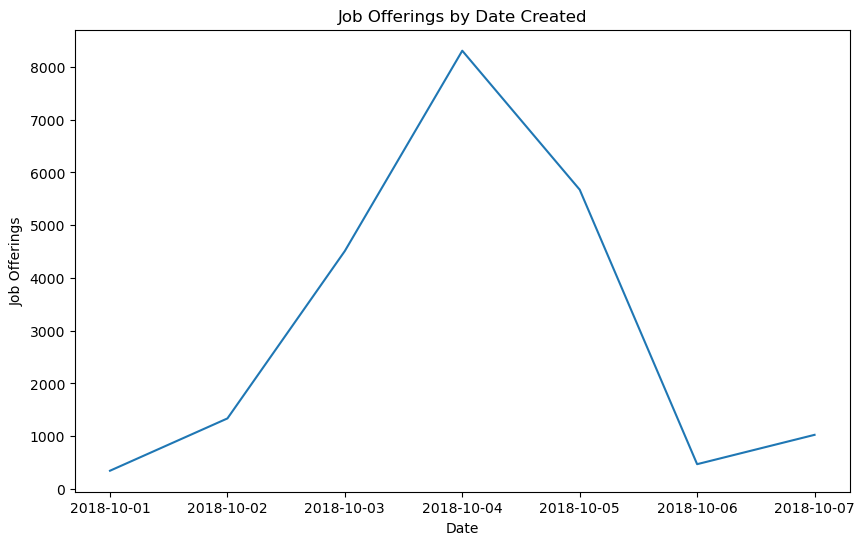

In [24]:
metadataDf = pd.read_csv('preprocessed_data.csv')
date_counts = metadataDf['Date'].value_counts().sort_index()
date_counts.plot(kind='line', figsize=(10, 6))
plt.title('Job Offerings by Date Created')
plt.xlabel('Date')
plt.ylabel('Job Offerings')
plt.show()

Overall a majority of job postings were made Thursday, with Monday and Saturday seeing the fewest. This is unexpected, as it would be thought that most postings are made during the working week, yet Sunday saw more postings than Monday.

Visualisation of the number of job offerings created by each company (top 30 only)

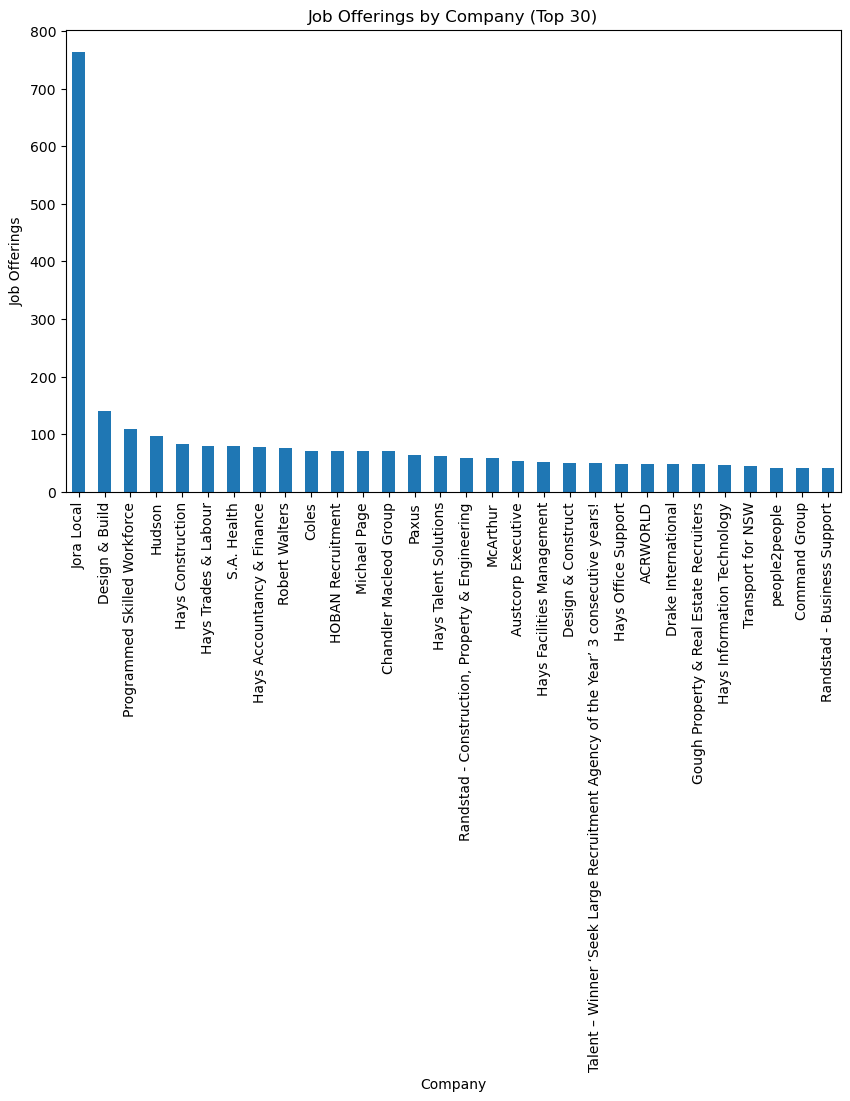

In [50]:
date_counts = metadataDf['Company'].value_counts().nlargest(30).sort_values(ascending=False)
date_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Job Offerings by Company (Top 30)')
plt.xlabel('Company')
plt.ylabel('Job Offerings')
plt.show()

The top 6 companies by job postings are all recruitment agencies. There is a large difference between the number of job postings made by Jora Local and the second largest job poster, one potential explaination is that Jora Local is app based and provides labour for hospitality industries, lowering the barrier to entry compared to the types of labour the other traditional recruitment agencies attempt to acquire

Distribution of job types within classifications

In [240]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

classification_dropdown = widgets.Dropdown(
    options=metadataDf['Classification'].unique(),
    description='Classification:'
)

def update_pie_chart(classification):
    job_type_count = metadataDf[metadataDf['Classification'] == classification]['JobType'].value_counts()
    fig = px.pie(names=job_type_count.index, values=job_type_count.values, title='Distribution of Job Types for Jobs in ' + classification)
    fig.show()

widgets.interactive(update_pie_chart, classification=classification_dropdown)

interactive(children=(Dropdown(description='Classification:', options=('Retail & Consumer Products', 'Call Cen…

# 5 Study the market by locations

## 5.1 Market size in each city

In [32]:
locationDf = df[df['Location'].notna()]
locationDf = locationDf.groupby('Location', observed=True).count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf['Id']

### 5.1.1 Get top 20 big cities and use bar chart to display market size in each city

In [33]:
top_20_cities = locationDf.sort_values(by='Count', ascending=False).head(20)
top_20_cities = top_20_cities[::-1]

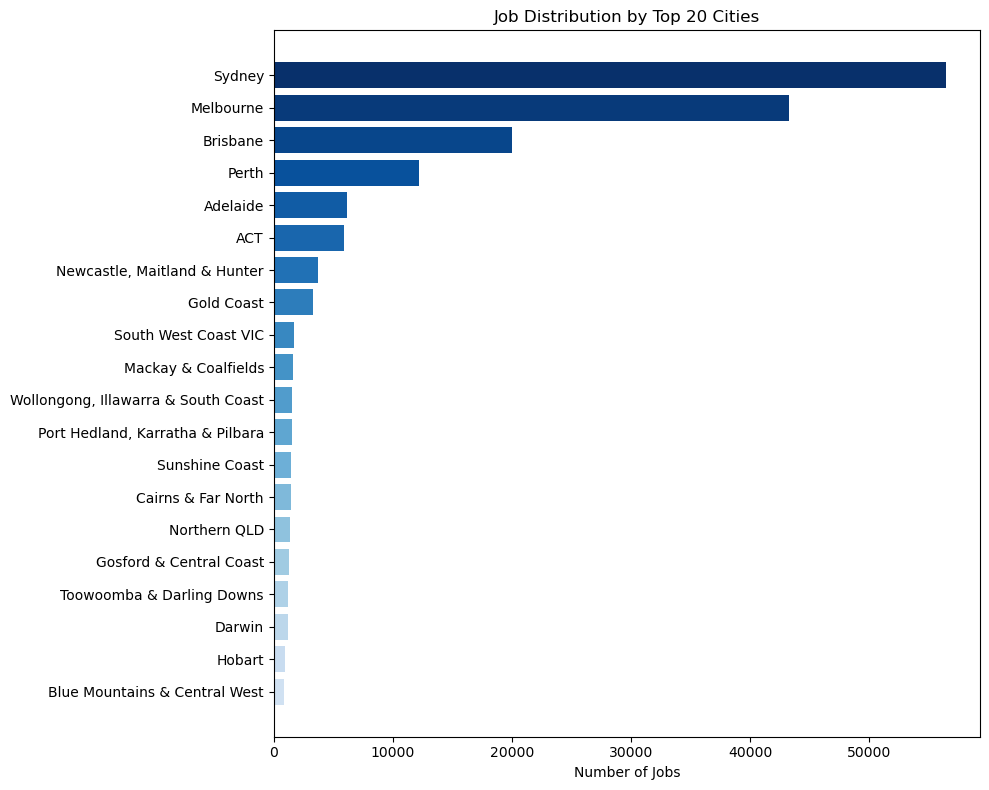

In [39]:
plt.figure(figsize=(10, 8))
plt.barh(
    top_20_cities['Location'],
    top_20_cities['Count'],
    color=plt.cm.Blues(np.linspace(0.2, 1, len(top_20_cities))),
)
plt.xlabel('Number of Jobs')
plt.title('Job Distribution by Top 20 Cities')
plt.tight_layout()
plt.show()

### 5.1.2 Visualise the market share between the cities

In [40]:
#Get top 10 big cities
locationTop10Df = locationDf.nlargest(10, 'Count').copy()
others_count = locationDf['Count'][10:].sum()

new_row = pd.DataFrame(data={
    'Location': ['Others'],
    'Count': [others_count]
})
locationTop10Df = pd.concat([locationTop10Df, new_row], ignore_index=True)
locationTop10Df.index = locationTop10Df['Location']

In [41]:
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
textprops = {'fontsize': 8, 'rotation': 0}

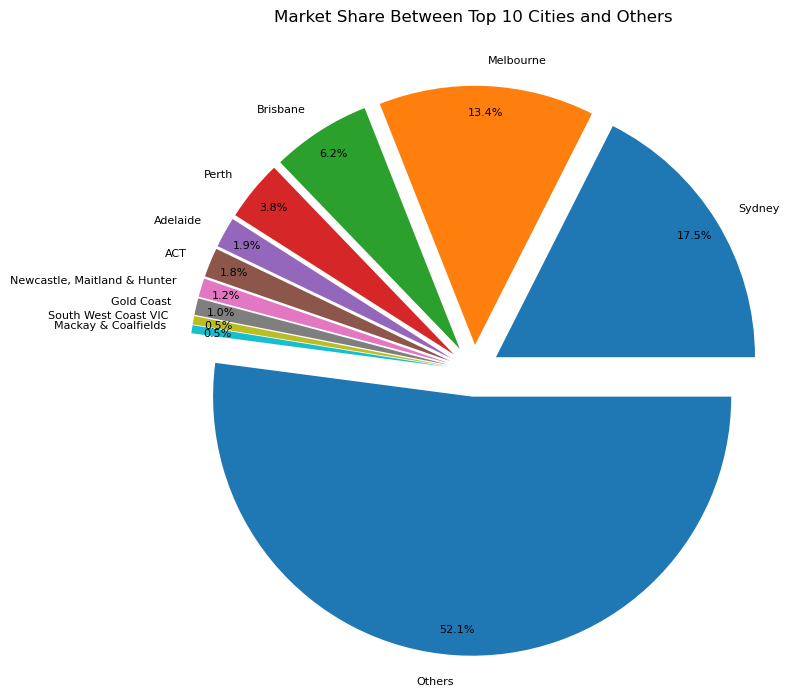

In [42]:
plt.figure(figsize=(8, 8))
plt.pie(
    locationTop10Df['Count'],
    labels=locationTop10Df['Location'],
    autopct='%1.1f%%',
    explode=explode,
    textprops=textprops,
    pctdistance=0.9,
)
plt.axis('equal')
plt.title('Market Share Between Top 10 Cities and Others', pad=30)
plt.show()

## 5.2 Top job sectors and sub-sectors in each city.

In [44]:
city_counts = df['Location'].value_counts().nlargest(5)

top_cities = city_counts.index.tolist()

df_top_cities = df[df['Location'].isin(top_cities)]

top_cities_sector_counts = df_top_cities.groupby(['Location', 'Classification'], observed=True).size().reset_index(name='Count')

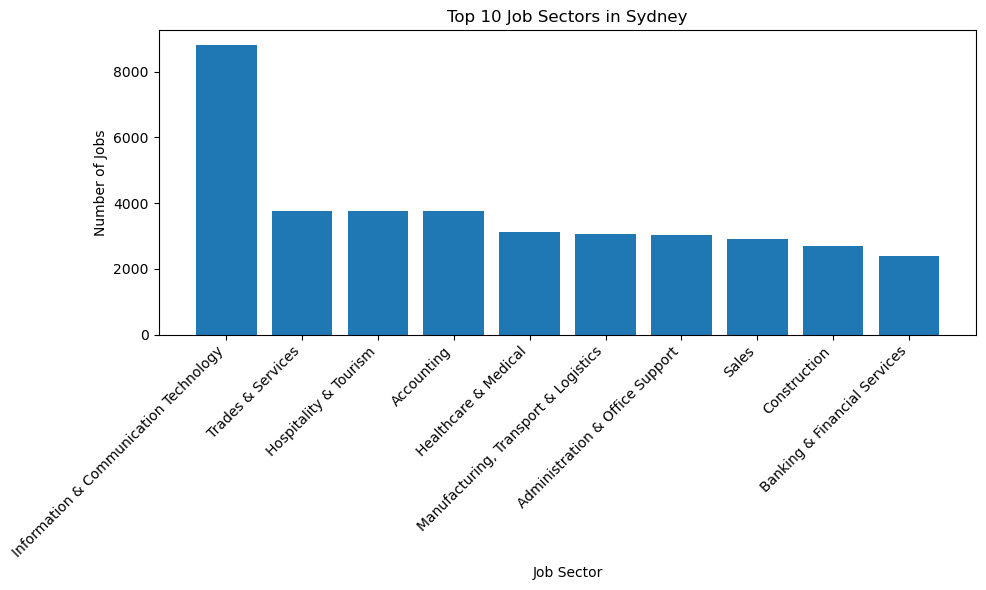

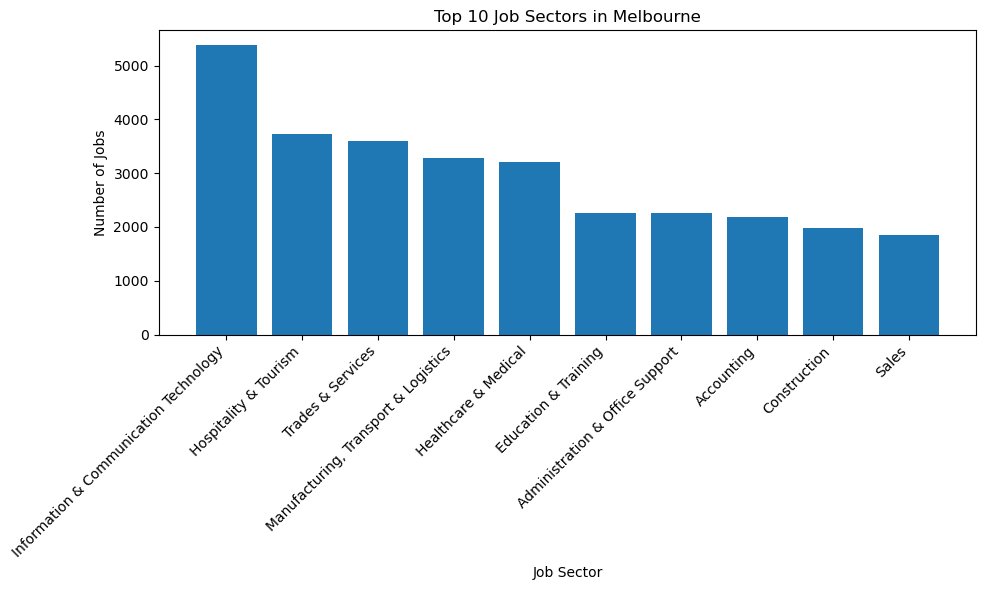

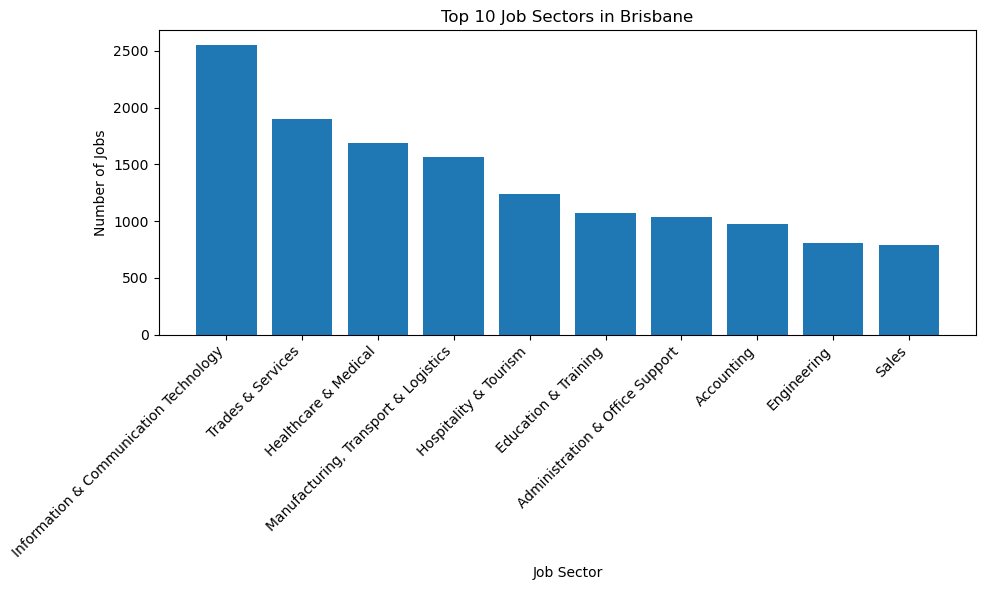

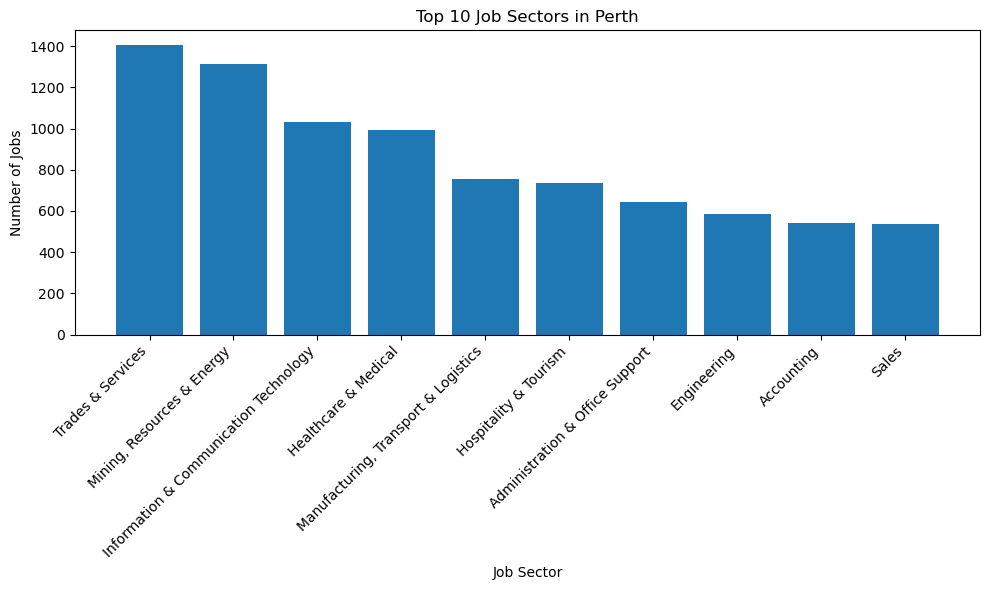

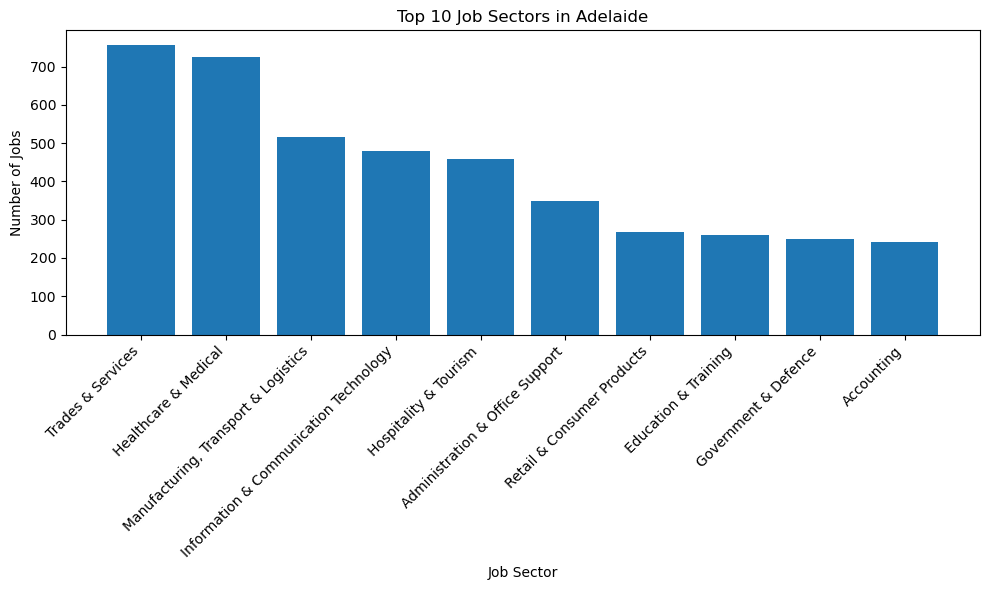

In [45]:
for city in top_cities:
    city_data = top_cities_sector_counts[top_cities_sector_counts['Location'] == city].nlargest(10, 'Count')
    plt.figure(figsize=(10, 6))
    plt.bar(city_data['Classification'], city_data['Count'])
    plt.xlabel('Job Sector')
    plt.ylabel('Number of Jobs')
    plt.title('Top 10 Job Sectors in ' + city)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [47]:
top_cities_sub_sector_counts = df_top_cities.groupby(['Location', 'SubClassification'], observed=True).size().reset_index(name='Count')

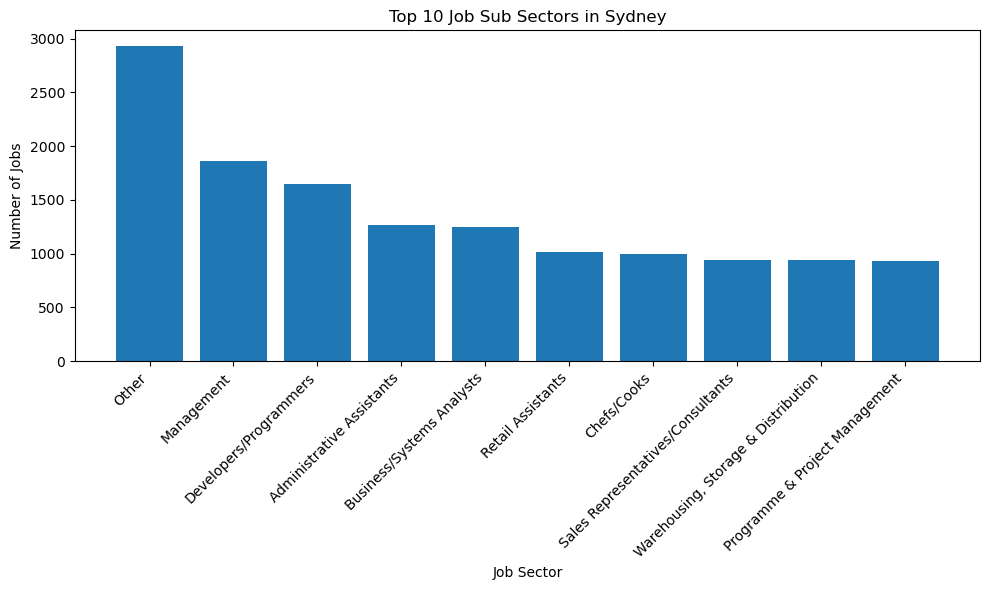

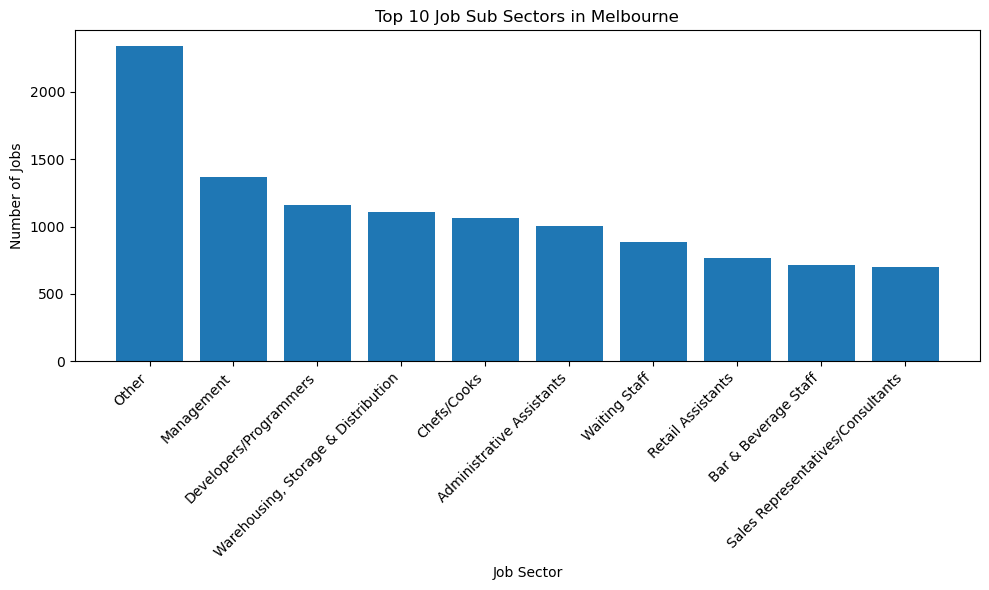

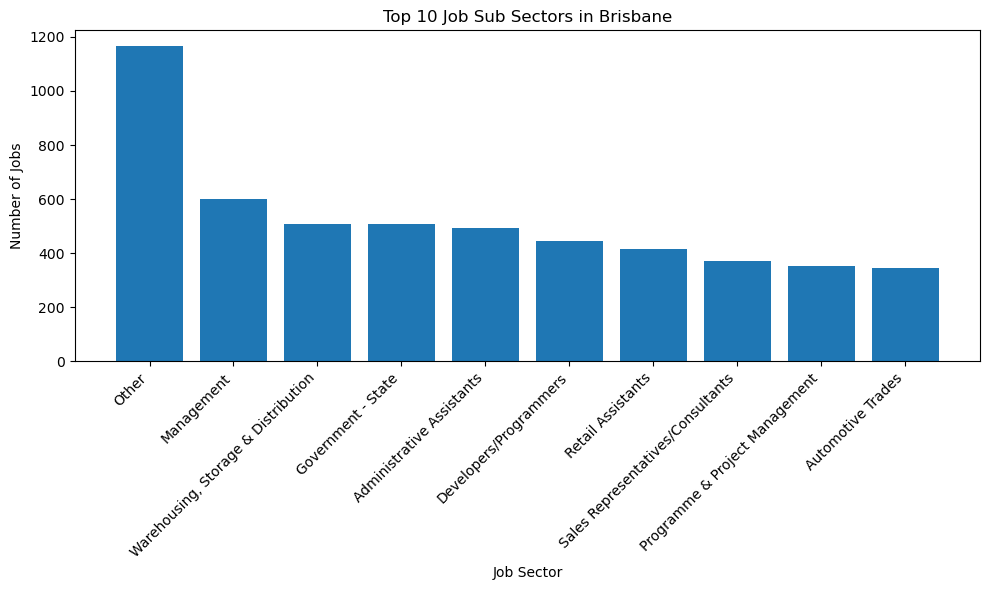

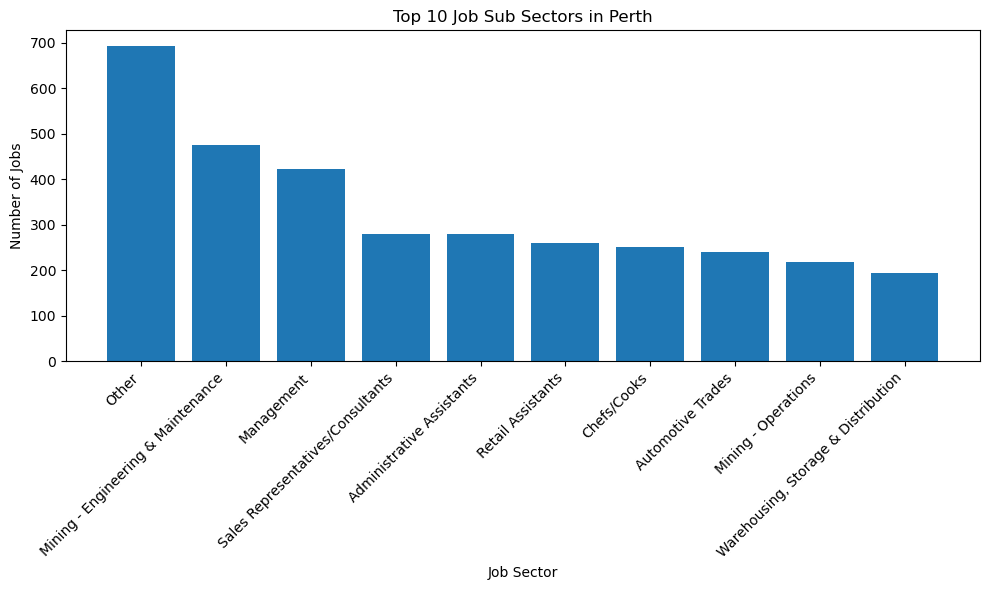

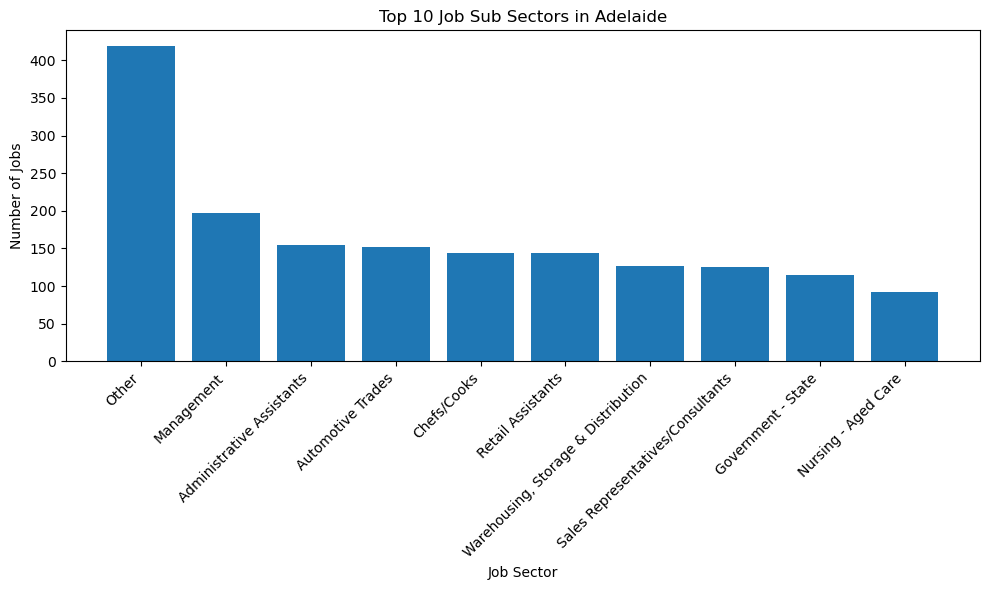

In [48]:
for city in top_cities:
    city_data = top_cities_sub_sector_counts[top_cities_sub_sector_counts['Location'] == city].nlargest(10, 'Count')
    plt.figure(figsize=(10, 6))
    plt.bar(city_data['SubClassification'], city_data['Count'])
    plt.xlabel('Job Sector')
    plt.ylabel('Number of Jobs')
    plt.title('Top 10 Job Sub Sectors in ' + city)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 5.3 Job post patterns

In [49]:
# Extract relevant time information
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['DayOfMonth'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

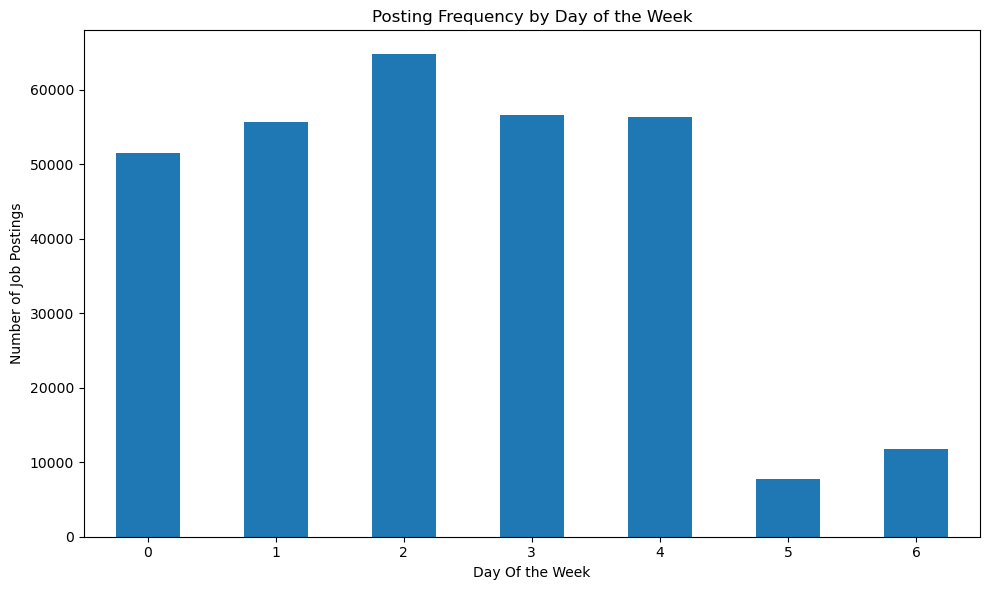

In [50]:
# Plot posting frequency by day of the week
plt.figure(figsize=(10, 6))
df.groupby('DayOfWeek').size().plot(kind='bar')
plt.xlabel('Day Of the Week')
plt.ylabel('Number of Job Postings')
plt.title('Posting Frequency by Day of the Week')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

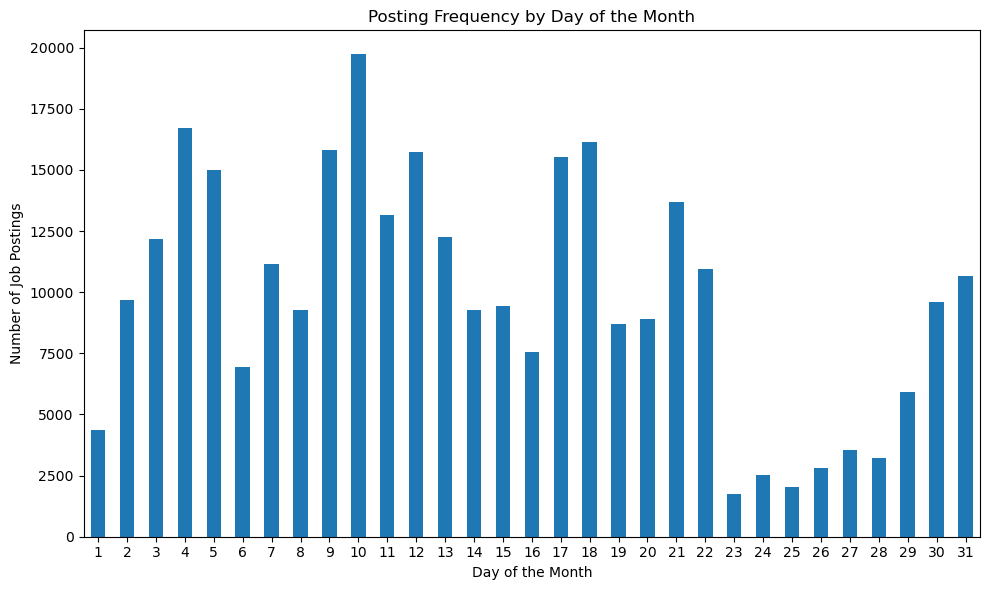

In [51]:
# Plot posting frequency by day of the month
plt.figure(figsize=(10, 6))
df.groupby('DayOfMonth').size().plot(kind='bar')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Job Postings')
plt.title('Posting Frequency by Day of the Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

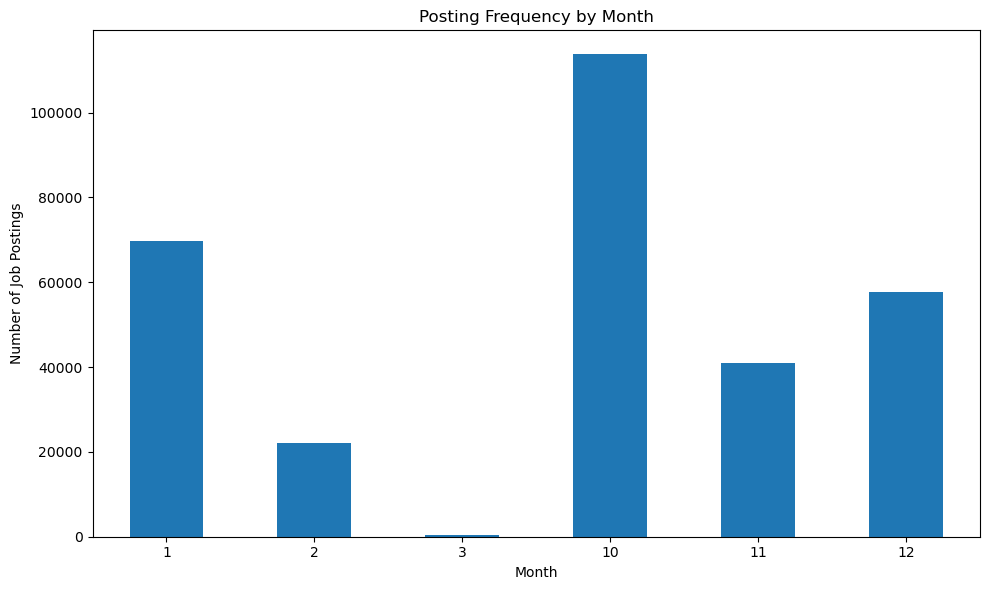

In [52]:
# Plot posting frequency by month
plt.figure(figsize=(10, 6))
df.groupby('Month').size().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.title('Posting Frequency by Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 5.4 Visualise the salary distribution in top biggest cities

In [53]:
top_10_cities = locationDf.nlargest(10, 'Count')['Location']

top_10_cities_df = df[df['Location'].isin(top_10_cities)]
average_salary_by_city = top_10_cities_df.groupby('Location', observed=True)['AverageSalary'].mean().sort_values()

other_cities_df = df[~df['Location'].isin(top_10_cities)]
average_salary_other_cities = other_cities_df['AverageSalary'].mean()
average_salary_by_city['Others'] = average_salary_other_cities

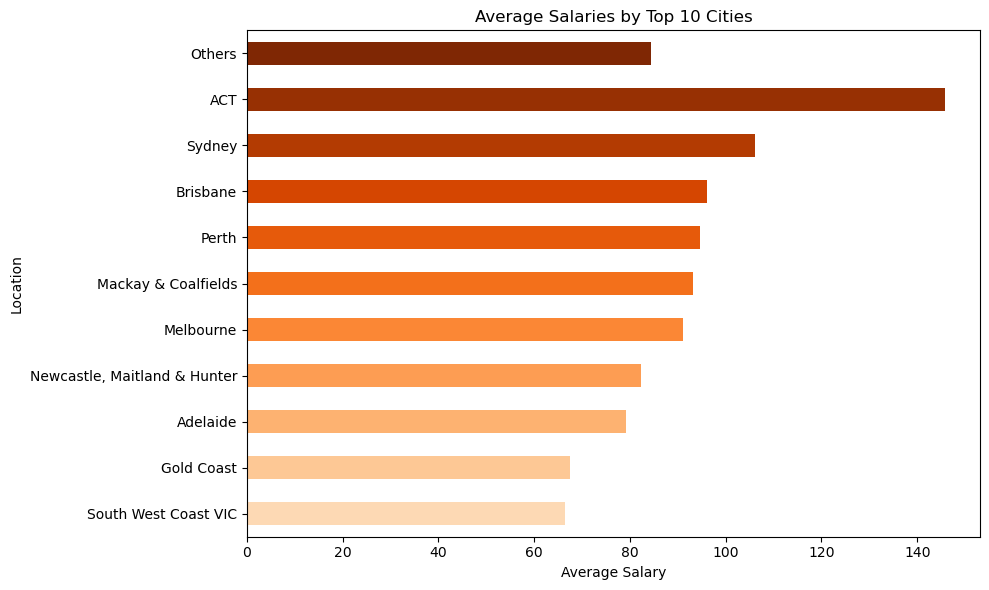

In [54]:
plt.figure(figsize=(10, 6))
average_salary_by_city.plot(
    kind='barh',
    color=plt.cm.Oranges(np.linspace(0.2, 1, len(average_salary_by_city))),
)
plt.title('Average Salaries by Top 10 Cities')
plt.xlabel('Average Salary')
plt.tight_layout()
plt.show()

# 6 Study by sectors

Which sectors keep the highest market share?

In [190]:
from matplotlib import cm

In [7]:
df=pd.read_csv('preprocessed_data.csv')
df_pie = df['Classification'].groupby(df['Classification'])

df_pie = df_pie.count().sort_values(ascending=False).to_frame()
df_pie['Count'] = df_pie['Classification']
df_pie['Classification'] = df_pie.index
df2 = df_pie[:10].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Count' : [df_pie['Count'][10:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.index = df2['Classification']

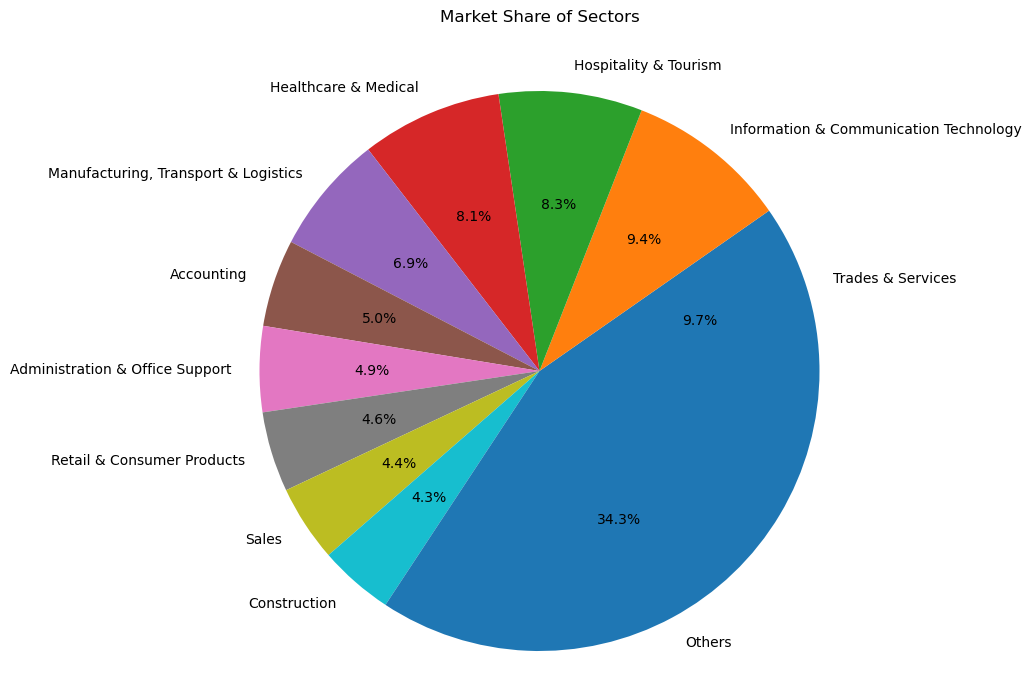

In [9]:
plt.figure(figsize=(10, 8))
plt.pie(
    df2['Count'],
    labels=df2['Classification'],
    autopct='%1.1f%%',
)
plt.title('Market Share of Sectors', pad=30)
plt.axis('equal')
plt.show()

In each sector, which sub-sectors are the main spotlights?

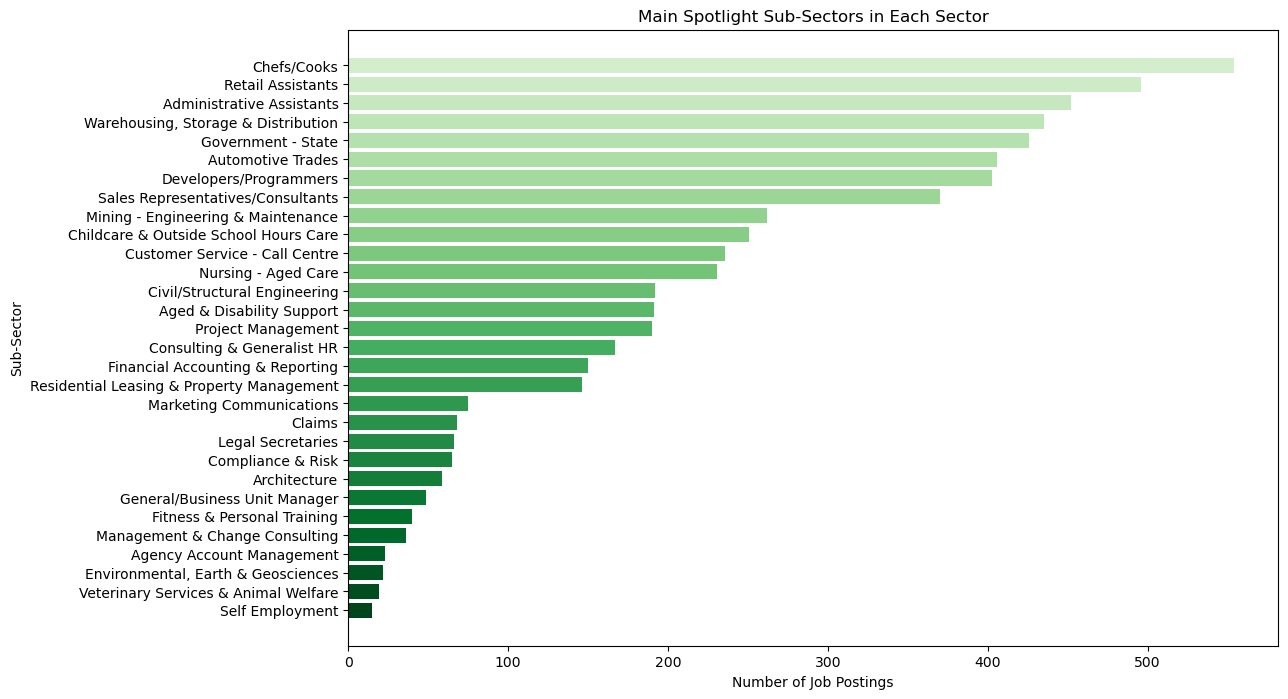

In [11]:
sector_subsector_counts = df.groupby(['Classification', 'SubClassification']).size().reset_index(name='Count')

main_spotlight_subsectors = sector_subsector_counts.groupby('Classification').apply(lambda x: x.loc[x['Count'].idxmax()])

main_spotlight_subsectors = main_spotlight_subsectors.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(
    main_spotlight_subsectors['SubClassification'],
    main_spotlight_subsectors['Count'],
    color=plt.cm.Greens(np.linspace(0.2, 1, len(main_spotlight_subsectors))),
)
plt.title('Main Spotlight Sub-Sectors in Each Sector')
plt.xlabel('Number of Job Postings')
plt.ylabel('Sub-Sector')
plt.gca().invert_yaxis()
plt.show()

What is the salary range for each sector/sub-sector? Can you 
compare the salary range between sectors/subsectors


In [264]:
sector_subsector_average_salary = df.groupby(['Classification', 'SubClassification'])['AverageSalary'].mean().reset_index()

<Figure size 1200x800 with 0 Axes>

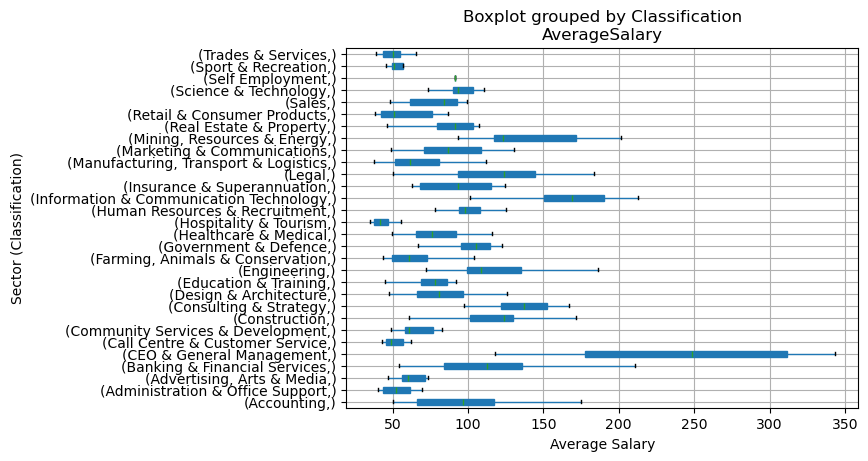

In [265]:
plt.figure(figsize=(12, 8))
sector_subsector_average_salary.boxplot(
    by=['Classification'],
    column='AverageSalary',
    vert=False,
    patch_artist=True,
    showfliers=False,
)
plt.xlabel('Average Salary')
plt.ylabel('Sector (Classification)')
plt.show()

In [268]:
top_20_subsectors = sector_subsector_average_salary.nlargest(20, 'AverageSalary')

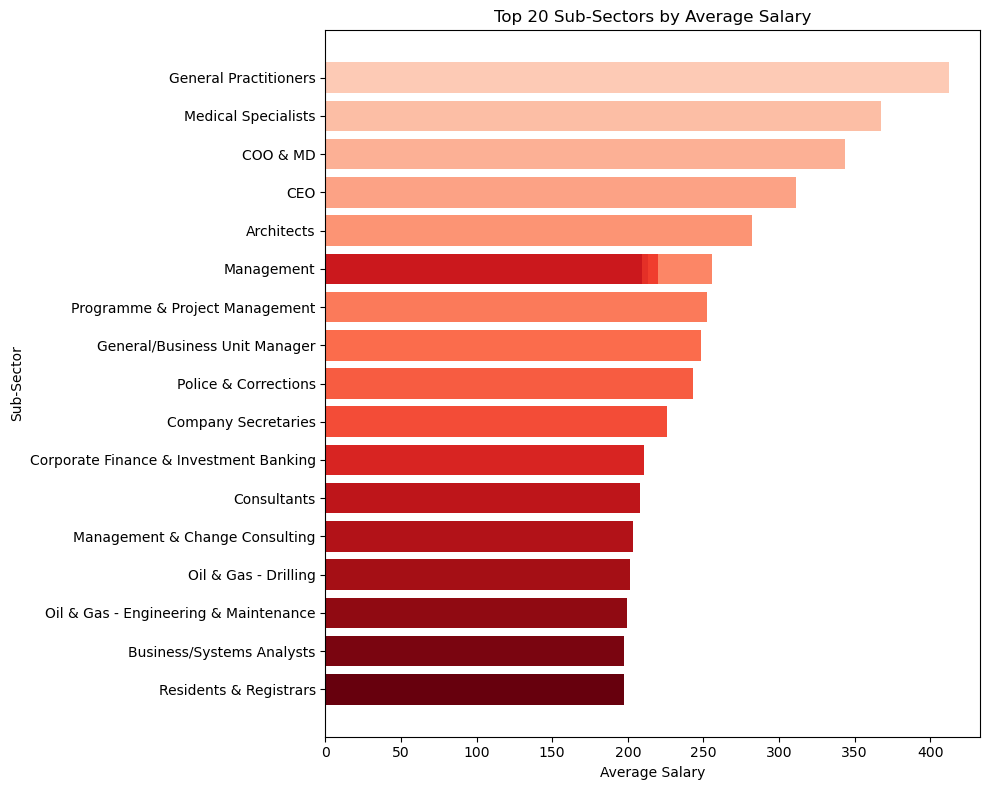

In [287]:
plt.figure(figsize=(10, 8))
plt.barh(
    top_20_subsectors['SubClassification'],
    top_20_subsectors['AverageSalary'],
    color=plt.cm.Reds(np.linspace(0.2, 1, len(top_20_subsectors))),
)
plt.xlabel('Average Salary')
plt.ylabel('Sub-Sector')
plt.title('Top 20 Sub-Sectors by Average Salary')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [281]:
bottom_20_subsectors = sector_subsector_average_salary.nsmallest(20, 'AverageSalary')

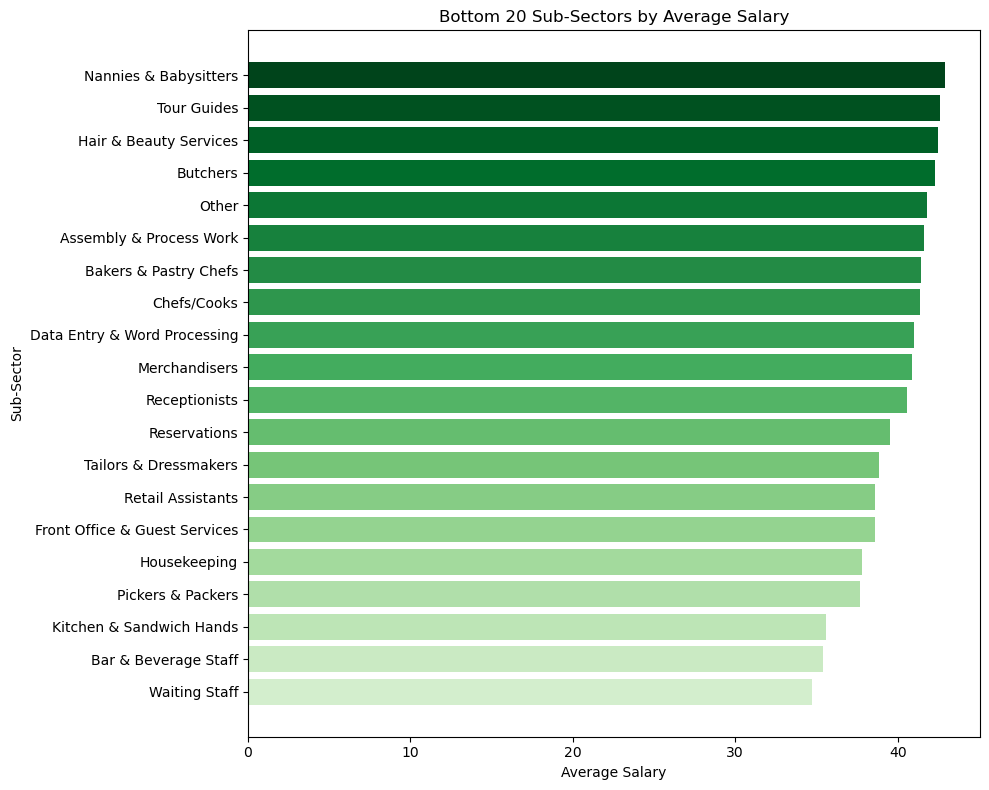

In [288]:
plt.figure(figsize=(10, 8))
plt.barh(
    bottom_20_subsectors['SubClassification'],
    bottom_20_subsectors['AverageSalary'],
    color=plt.cm.Greens(np.linspace(0.2, 1, len(bottom_20_subsectors))),
)
plt.xlabel('Average Salary')
plt.ylabel('Sub-Sector')
plt.title('Bottom 20 Sub-Sectors by Average Salary')
plt.tight_layout()
plt.show()

Market share of jobs weighted by their average salary

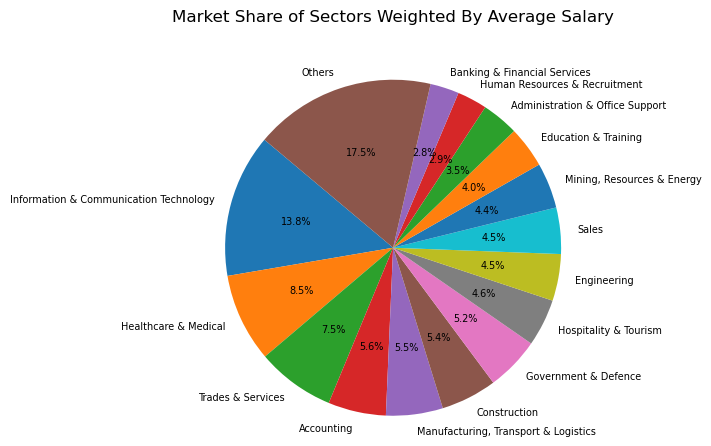

In [229]:
df=pd.read_csv('preprocessed_data.csv')
sector_subsector_average_salary = df.groupby(['Classification'])['AverageSalary'].mean().reset_index()
df_pie = df['Classification'].groupby(df['Classification'])
df_pie = df_pie.count().to_frame()
df_pie = df_pie.rename(columns={'Classification': 'Count'})
merged_df=pd.merge(df_pie, sector_subsector_average_salary, on='Classification')
result = merged_df['AverageSalary'].multiply(merged_df['Count'])
merged_df['WeightedMarketShare'] = result
merged_df=merged_df.sort_values(by='WeightedMarketShare', ascending=False)
merged_df2 = merged_df[:15].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'WeightedMarketShare' : [merged_df['WeightedMarketShare'][15:].sum()]
})

merged_df2 = pd.concat([merged_df2, new_row])
plt.pie(
    merged_df2['WeightedMarketShare'],
    labels=merged_df2['Classification'],
    autopct='%1.1f%%',
    textprops={'fontsize': 7},
    startangle=140
)
plt.title('Market Share of Sectors Weighted By Average Salary', pad=30)
plt.axis('equal')
plt.show()

What is the trending of the market, i.e. if a high school student 
asks you which subject should he/she learn in the university (to 
guarantee a job in the future),what is your advice??


Information & Communication Technology is currently trending in the market, with a high average salary and a large market share of jobs, and overall is the prime recommendation for a student deciding which subject they should study in university. When considering salary and market share, healthcare and medical related jobs are also very good.

Can you detect which skills are required in each sector?

In [169]:
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag

In [251]:
#Skills are nouns
def tokenize_and_filter_nouns(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    noun_tokens = [token for token, pos in tagged_tokens if pos.startswith('N')]
    return noun_tokens

def preprocessing(classification, csv=None):
    if csv!=None:
        df = pd.read_csv(csv)
    else:
        df=pd.read_csv("preprocessed_data.csv")
        df.loc[df['Classification']==classification, 'Tokenized'] = df['Requirement'].apply(tokenize_and_filter_nouns)
        df.dropna(subset=['Tokenized'], inplace=True)
        # Remove punctuation
        df['Tokenized']=df['Tokenized'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])
        # Remove stop words
        df['Tokenized']=df['Tokenized'].apply(lambda tokens: [token for token in tokens if token.lower() not in nltk.corpus.stopwords.words('english')])
        # Lemmatization
        wnl=WordNetLemmatizer()
        df['Tokenized']=df['Tokenized'].apply(lambda tokens: [wnl.lemmatize(token) for token in tokens])
        df.to_csv(classification+"_tokenized_data.csv")
    return df

def tfidf_transform_and_display(df, classification, phrase_number):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tokenized'])
    avg_tfidf_scores = tfidf_matrix.mean(axis=0)
    scores = avg_tfidf_scores.A1
    terms = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame({'term': terms, 'tfidf': scores})
    tfidf_df = tfidf_df.sort_values(by='tfidf')
    top_words = tfidf_df.nlargest(phrase_number, 'tfidf').iloc[::-1]
    # Create a bar graph of the top words and their scores
    plt.figure(figsize=(20, phrase_number/5))
    plt.barh(top_words['term'], top_words['tfidf'])
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Words')
    plt.title('Top '+str(phrase_number)+' Phrases by TF-IDF Score in '+classification+' requirement')
    plt.tight_layout()
    plt.show()

def skill_identifier(classification, phrase_number, csv=None):
    df=preprocessing(classification, csv)
    tfidf_transform_and_display(df, classification, phrase_number)

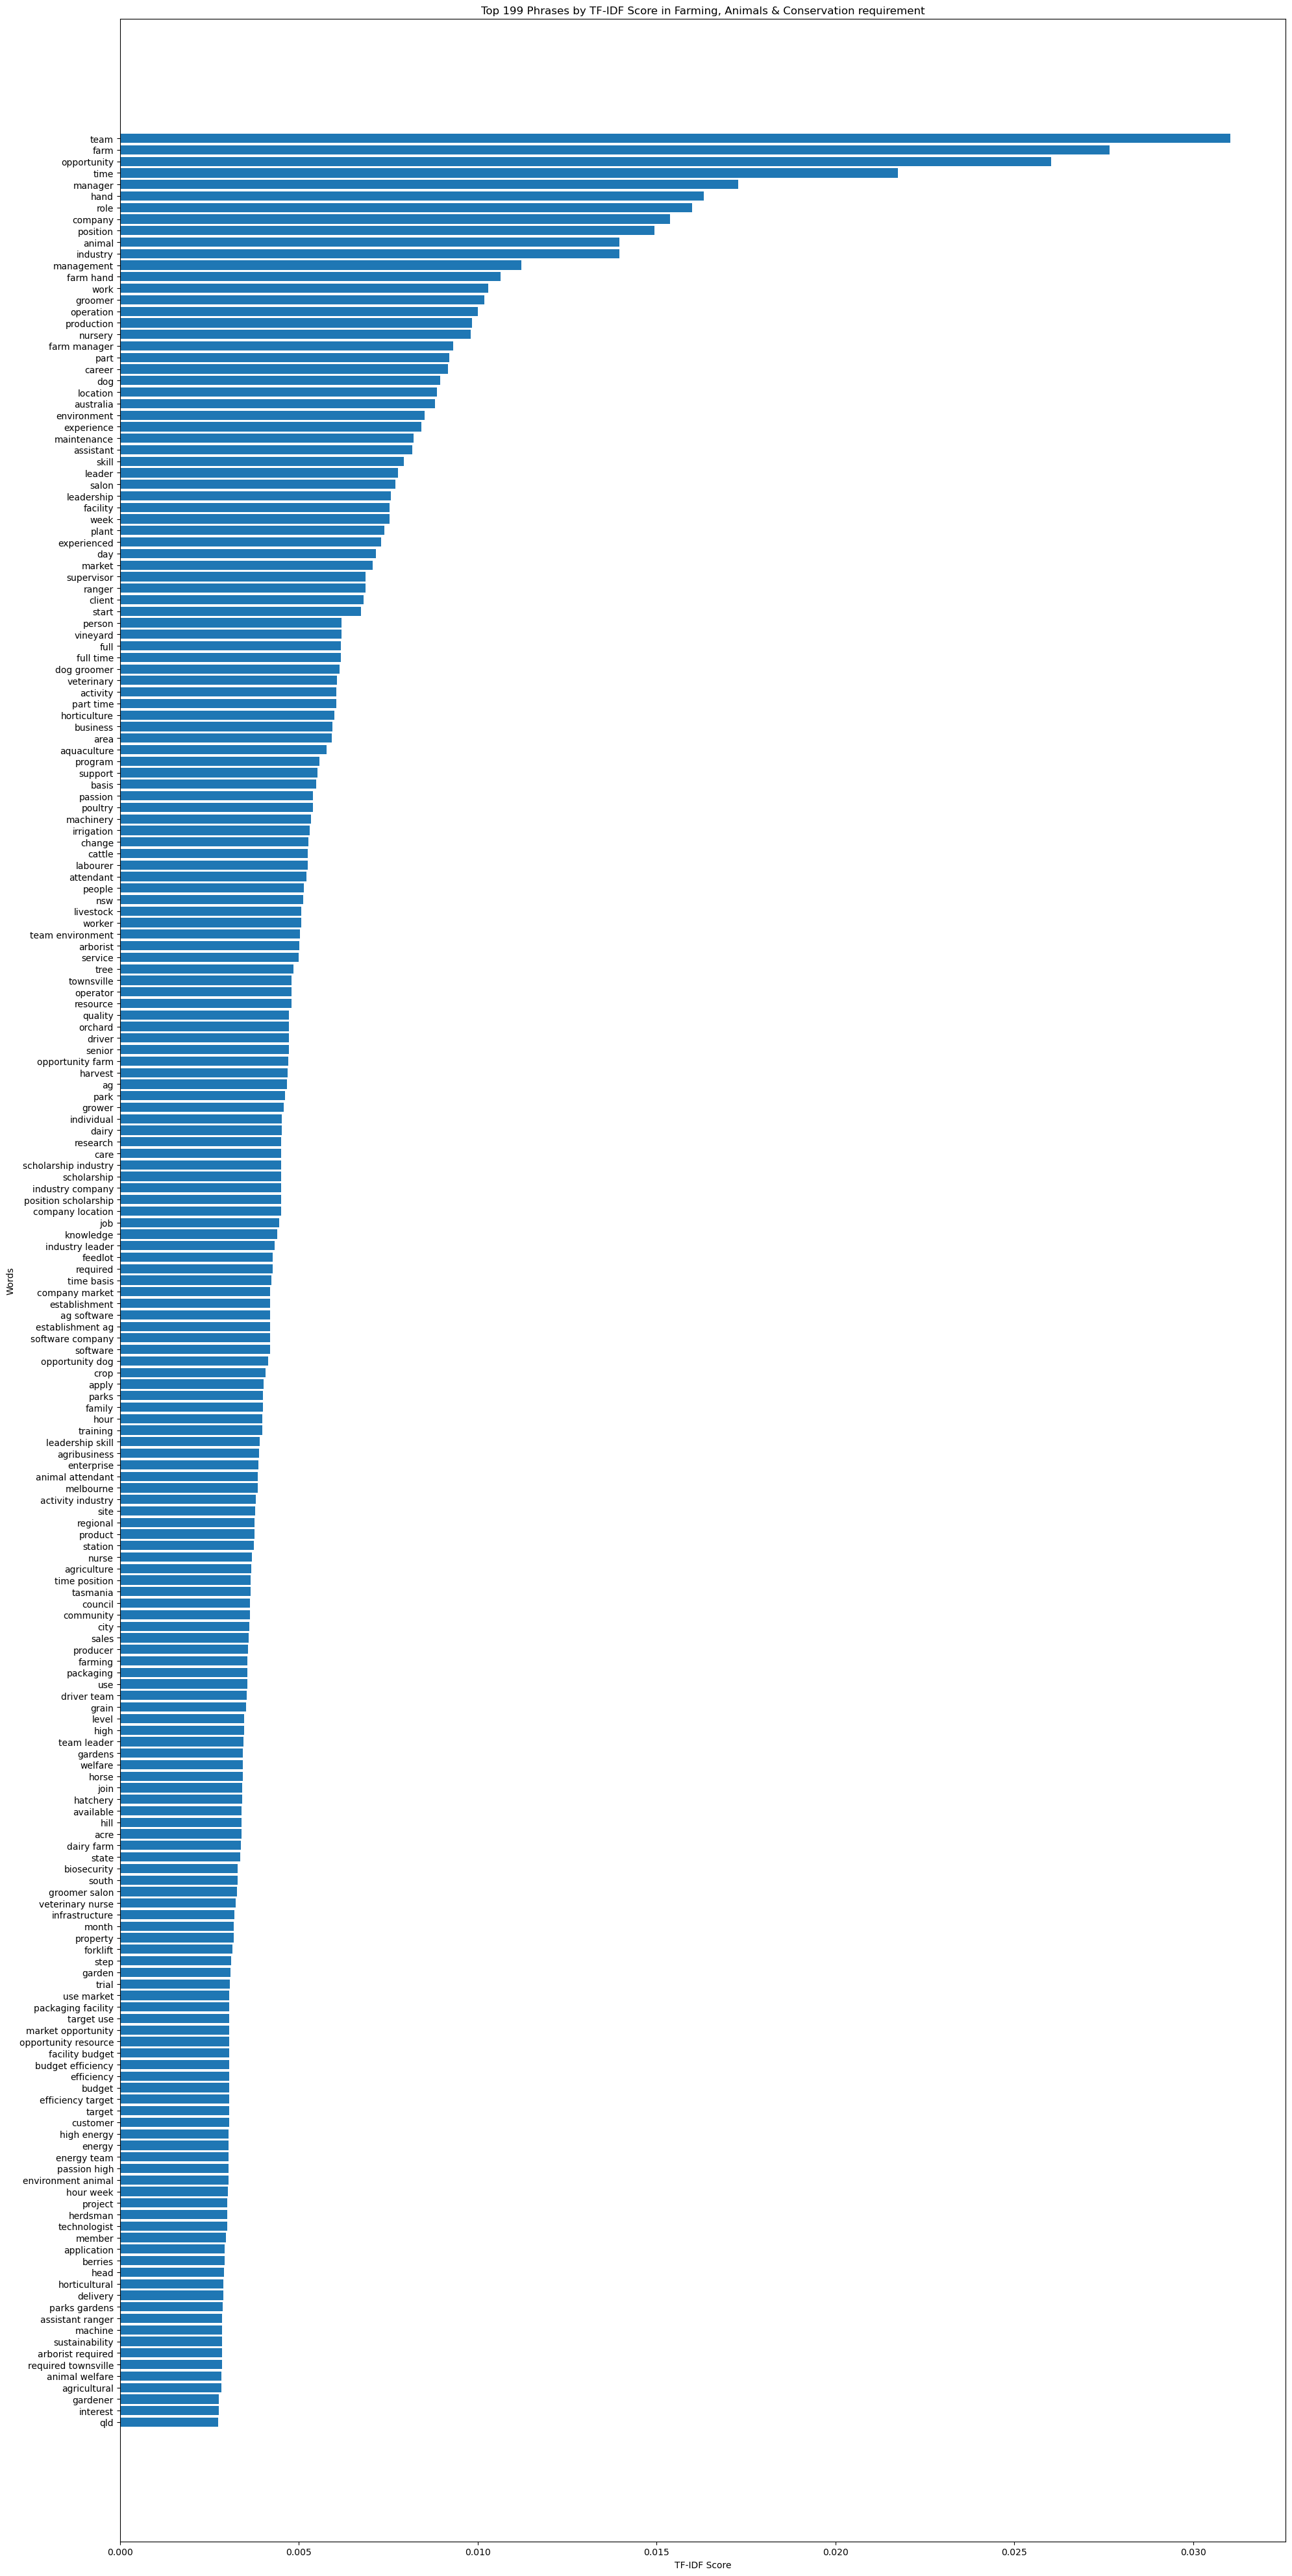

In [253]:
#Can use to identify skills for all classifications, only demonstrating one example for sake of computational time
skill_identifier("Farming, Animals & Conservation", 199)

# 8 Data analytics findings

Overall, team is frequently mentioned in requirements amongst all job postings. This suggests that teamwork and working within a team is one of the most important skills for any job.

# 9 Suggested actions for balancing the markets

# 10 Refining data analytics

Different data sources could have been used to provide a more representative sample, for example using different recruitment websites such as LinkedIn or Jora, or even paper postings such as those in the newspaper. 

Different parameters? 

Other techniques? 

More relevant data could have been obtained by using more up to date job postings, and by only considering job postings that are less than a certain number of months old. This is because, according to one survey, many job postings are created without the intention to hire, and are therefore not representative of potential positions a candidate could fill (https://clarifycapital.com/job-seekers-beware-of-ghost-jobs-survey).

# 11 Implications for employers and employees

# 12 Case Study 1

In [158]:
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag

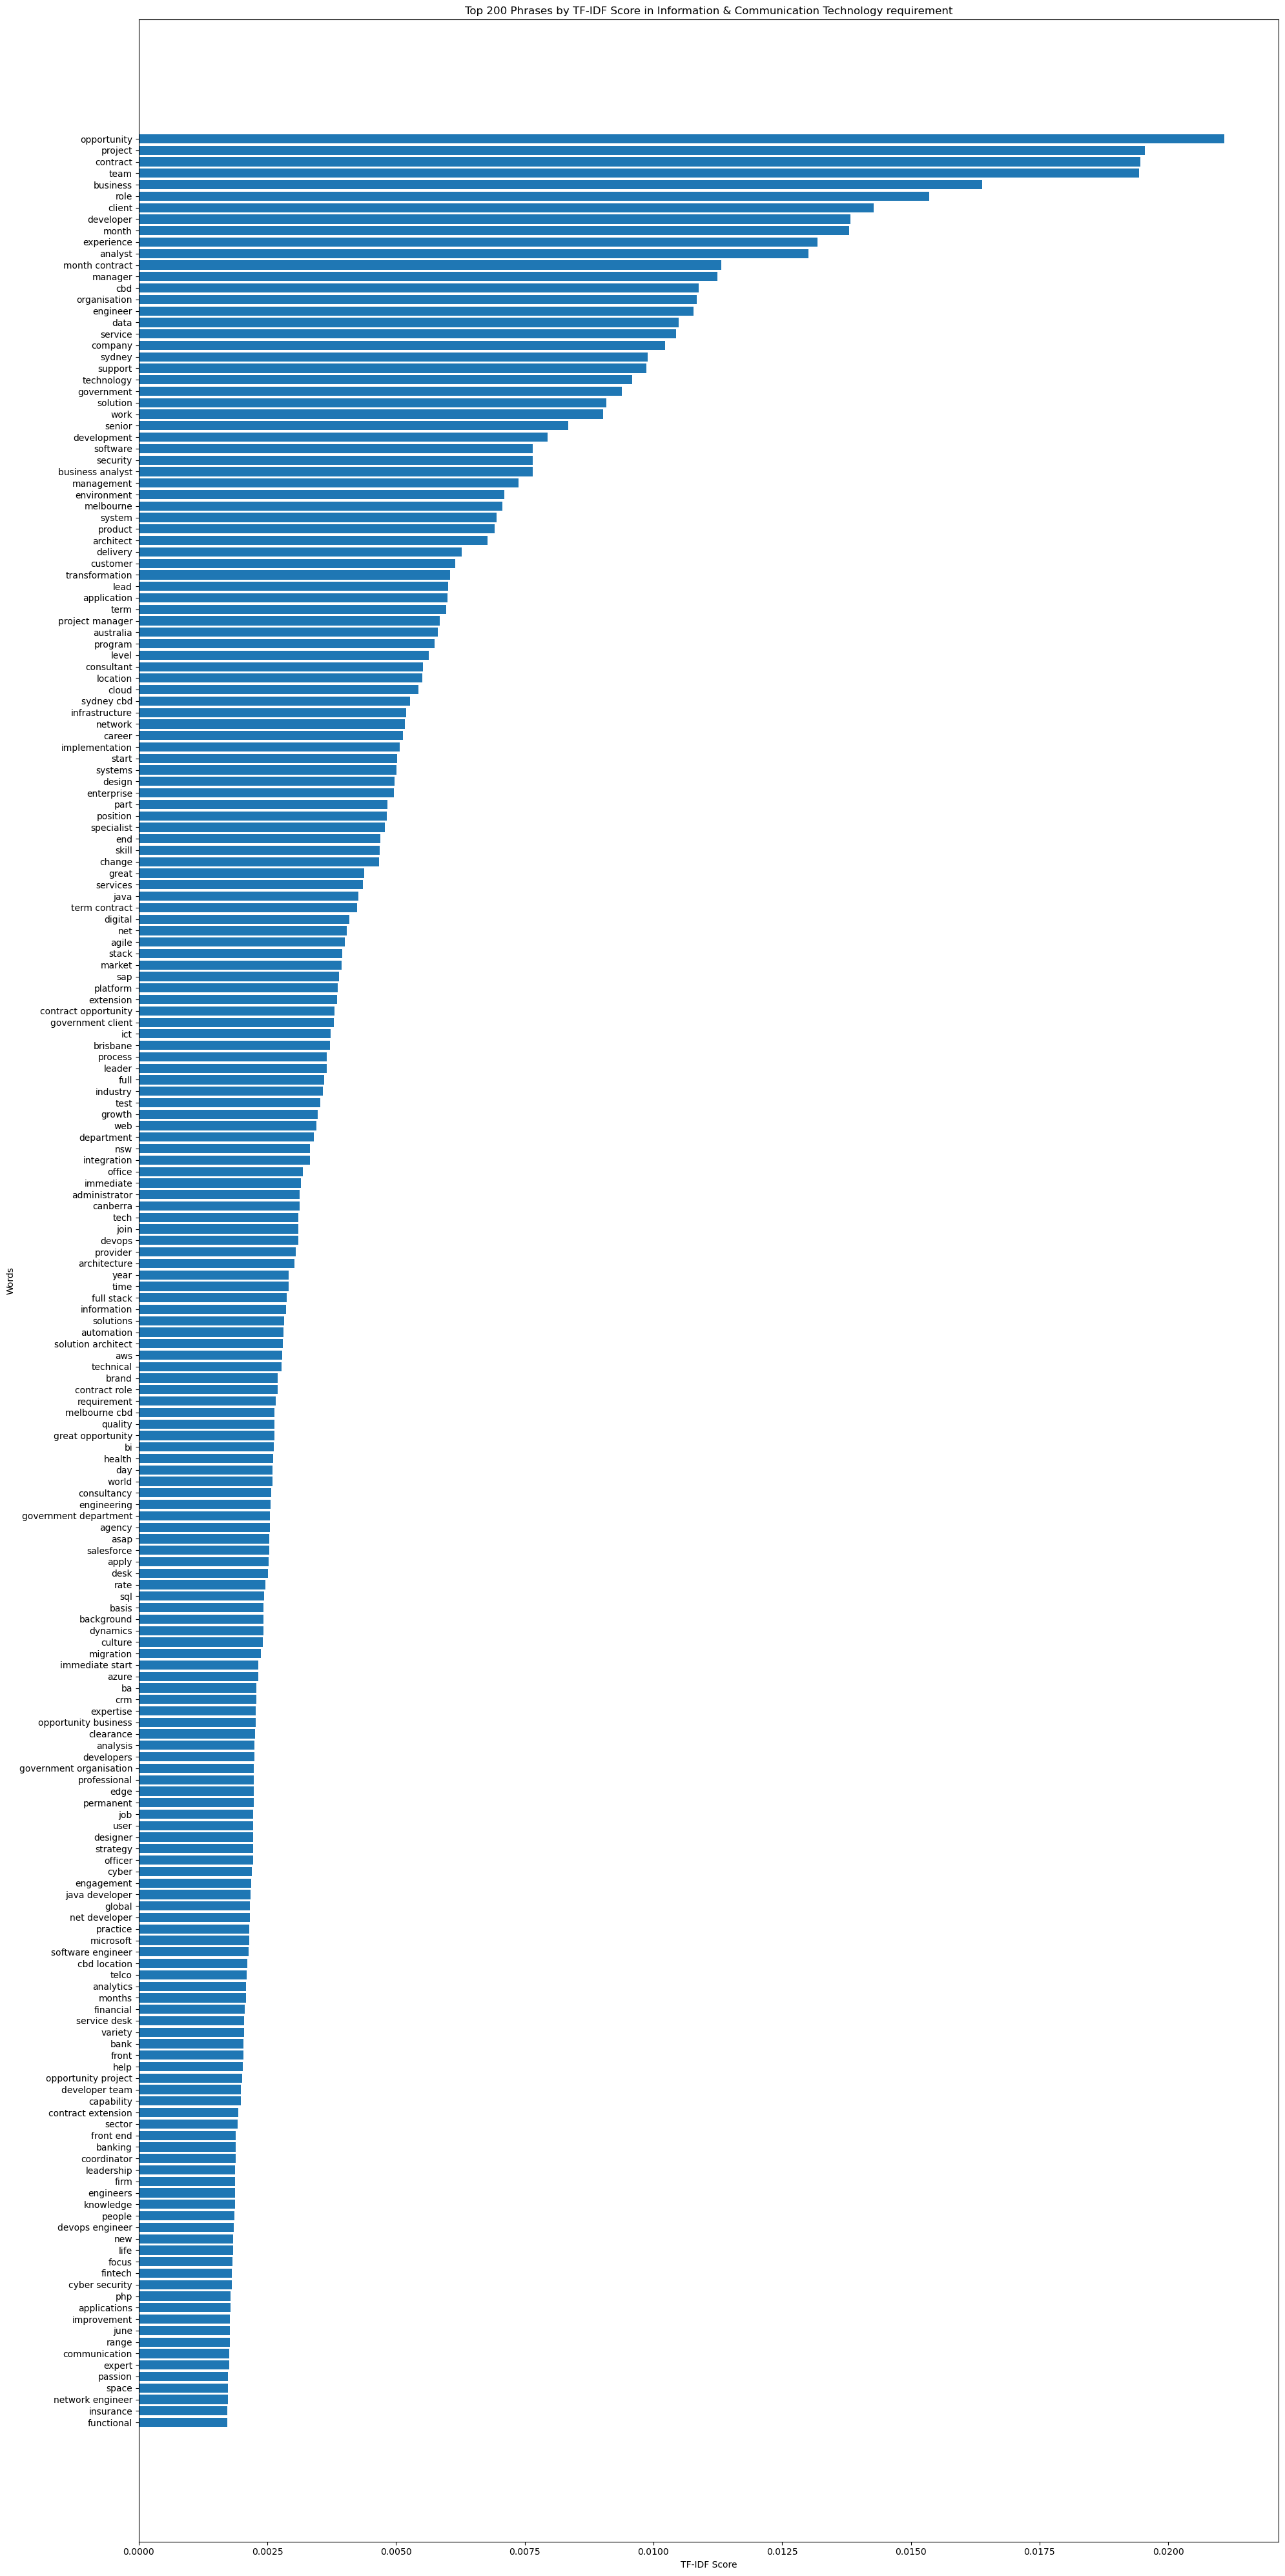

In [260]:
skill_identifier("Information & Communication Technology", 200, 'tokenized_data.csv')

Based on the current job market dataset, Matthew should take subjects in:
- Devops
- Sql
- Cloud
- Amazon Web Services (aws)
- Enterprise resource planning software (sap)
- Business Intelligence software (bi)
- Front end web development (front end)
- Java
- Agile software development
- Full stack development

This is because the terms associated with these skills have a high tf-idf score, indicating that they are most relevant.

# 13 Case Study 2

In [7]:
#Will most likely use second version as it reads from external txt but leaving this in incase we change our minds
import numpy as np

df = pd.read_csv('data.csv')
df.fillna('', inplace=True)
df['combined_text'] = df['Title'] + ' ' + df['Company'] + ' ' + df['Location'] + ' ' + df['Area'] + ' ' + df['Classification'] + ' ' + df['SubClassification'] + ' ' + df['Requirement'] + ' ' + df['FullDescription']
df[['Id', 'combined_text']].head()

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

tfidf_matrix = vectorizer.fit_transform(df['combined_text'])
tfidf_matrix.shape

from sklearn.metrics.pairwise import cosine_similarity

def recommend_jobs(candidate_profile, tfidf_matrix, df, top_n=10):
    candidate_tfidf = vectorizer.transform([candidate_profile])
    cosine_similarities = cosine_similarity(candidate_tfidf, tfidf_matrix).flatten()
    top_indices = cosine_similarities.argsort()[-top_n:][::-1]
    
    return df.iloc[top_indices]

candidate_profile = "Data scientist with experience in machine learning, Python, and data analysis"

top_jobs = recommend_jobs(candidate_profile, tfidf_matrix, df)
top_jobs

top_jobs[['Id', 'Title', 'Company', 'Location', 'LowestSalary', 'HighestSalary', 'JobType']]

/var/folders/4b/x1qmm8g167d86vjglntrzwdh0000gn/T/ipykernel_15687/3505365634.py:4: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


,Id,Title,Company,Location,LowestSalary,HighestSalary,JobType
22766,37359901,Data Scientist - Machine Learning,FourQuarters Recruitment,Melbourne,150,200,Full Time
217101,37960667,"Data Scientist - Machine Learning, Python",HiTech Personnel,,150,200,Contract/Temp
65365,37438144,Data Scientist - Machine learning - Federal Go...,HiTech Personnel,ACT,150,200,Contract/Temp
212820,37981317,Data Scientist,SustainDigital,,100,120,Full Time
108685,37578892,Senior Data Scientist,Morgan McKinley,Sydney,120,150,Full Time
131481,37634094,Data Scientist,SustainDigital,Sydney,100,120,Full Time
247541,38087116,"Data Scientist l Machine Learning l $150,000 -...",,,0,30,Full Time
200477,37985761,"Data Scientist, Analytics, Machine Learning - ...",Infinity Pro,,0,30,Full Time
217815,37963250,Data Scientist,Compas Pty Ltd,,150,200,Contract/Temp
246736,38001628,Data Scientist,Exclaim IT,,150,200,Contract/Temp


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('data.csv')
df.fillna('', inplace=True)

df['combined_text'] = df['Title'] + ' ' + df['Company'] + ' ' + df['Location'] + ' ' + df['Area'] + ' ' + df['Classification'] + ' ' + df['SubClassification'] + ' ' + df['Requirement'] + ' ' + df['FullDescription']
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['combined_text'])

with open('resume.txt', 'r') as file:
    candidate_profile = file.read()

def recommend_jobs(candidate_profile, tfidf_matrix, df, top_n=10):
    candidate_tfidf = vectorizer.transform([candidate_profile])

    cosine_similarities = cosine_similarity(candidate_tfidf, tfidf_matrix).flatten()

    top_indices = cosine_similarities.argsort()[-top_n:][::-1]
    
    return df.iloc[top_indices]

top_jobs = recommend_jobs(candidate_profile, tfidf_matrix, df)

top_jobs[['Id', 'Title', 'Company', 'Location', 'LowestSalary', 'HighestSalary', 'JobType']]

/var/folders/4b/x1qmm8g167d86vjglntrzwdh0000gn/T/ipykernel_15687/2064012591.py:5: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


,Id,Title,Company,Location,LowestSalary,HighestSalary,JobType
297032,38370021,Customer Service Representative,,,0,30,
233800,38010359,Customer Service Representative,PFD Food Services Pty Ltd,,40,50,
301026,38317273,Customer Service Representative,PFD Food Services Pty Ltd,,30,40,
277283,38149897,Casual Food Delivery Driver in Collaroy Plateau,Jora Local,,30,40,Casual/Vacation
4396,37388208,Part time Food Delivery Driver in Doreen,Jora Local,Melbourne,30,40,Part Time
93618,37537775,Part time Food Delivery Driver in Doreen,Jora Local,Melbourne,30,40,Part Time
163173,37899346&searchrequesttoken=fd828ae7-86fe-44e0...,Part time Food Delivery Driver in Craigieburn,Jora Local,Melbourne,30,40,Part Time
117843,37643003,Part time Food Delivery Driver in Altona,Jora Local,Melbourne,30,40,Part Time
46705,37482628,Part time Food Delivery Driver in Altona,Jora Local,Melbourne,30,40,Part Time
224020,37993474,Casual Food Delivery Driver in Mentone,Jora Local,,30,40,Casual/Vacation


TalentFinders is trying to match employees CVs with suitable job opportunities based on their job sector, skills, experience ect. This case study will explore how is it possible to leverage job market data to accurately match a resume to the top ten most suitable jobs for the candidate, using the dataset. This dataset contains job advertisements with various details such as job titles, companies, locations and descriptions.

The dataset is first loaded into a pandas dataframe to make manipulating and changing the data easier. Any missing values are also replaced by empty strings to make the data compatible and consistent.

Then all the text fields that could possibly relate to the candidates relevancy to a particular position were combined into a single column. These included the job titles, company names, locations, areas, classifications, sub-classifications, requirements and full descriptions.

The TF-IDF (Term Frequency-Inverse Document Frequency) technique was then used to convert the text in the combined data into numerical variables to make it easier to capture the importance of the words relative to the dataset. Term frequency measures how frequently the term appears and INverse Document Frequency measures how rare the term is across the document, TF-IDF is the combination of these two values.

The I read the candidates resume from a resume.txt file. To compare the individual profile against the dataset to find the most relevant jobs. To recommend the jobs a function was defined which caluclulates the cosine similarity between this profile and all jobb descriptions in the dataset. This function returns the top N job descriptions that are the most similar. These can then be generated and displayed with the relevant details.

//Finalise the resume your going to use and write a quick paragraph on “Josh” and the jobs he is most suitable for

This way the job recommender uses natural language processing techniques and machine learning to match potential candidates with job opportunities based on the textual similarity between their resume and the job description